In [1]:
import pandas as pd
import scipy
import numpy as np
import scipy.sparse as sp
import scipy.io as spio

from scipy.stats import pearsonr

import operator
import matplotlib.pyplot as plt

import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib as mpl
from matplotlib.text import TextPath
from matplotlib.patches import PathPatch, Rectangle
from matplotlib.font_manager import FontProperties
from matplotlib import gridspec
from matplotlib.ticker import FormatStrFormatter
from sklearn.metrics import roc_auc_score

import seaborn as sns
import matplotlib.collections as collections

import isolearn.io as isoio

from apa_variant_prediction_utils import *

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


In [2]:
#Variant data parameters

isoform_pseudo_count = 1.
proximal_start = 57
proximal_end = 107

file_prefix = str(proximal_start) + "_" + str(proximal_end)


In [3]:
#Load variant dataframe
seq_dict = isoio.load('../data/prepared_data/apa_array_data/apa_array_data_master_seq')
variant_dict = isoio.load('../data/prepared_data/apa_variant_data/apa_variant_data_master_seq')
print("n (variants) = " + str(len(variant_dict['variant_df'])))

#Load predictions
model_name = 'aparent_theano_legacy_30_31_34_pasaligned'
pred_dict = isoio.load('predictions/apa_array_data_legacy/' + model_name + '_predictions_master_seq')

#Join mpra dataframes with prediction table and calculate cut probabilities
seq_df_aparent, variant_df_aparent = append_predictions(seq_dict['array_df'], seq_dict['pooled_cuts'], variant_dict['variant_df'], variant_dict['pooled_cuts_var'], variant_dict['pooled_cuts_ref'], pred_dict['array_df'], pred_dict['cut_prob'], proximal_start=proximal_start, proximal_end=proximal_end, isoform_pseudo_count=isoform_pseudo_count)


n (variants) = 21734


In [4]:
#Load variant dataframe
seq_dict = isoio.load('../data/prepared_data/apa_array_data/apa_array_data_master_seq')
variant_dict = isoio.load('../data/prepared_data/apa_variant_data/apa_variant_data_master_seq')
print("n (variants) = " + str(len(variant_dict['variant_df'])))

#Load predictions (Resnet)
model_name = 'aparent_all_libs_resnet_no_clinvar_wt_ep_5'
pred_dict = isoio.load('predictions/apa_array_data_legacy/' + model_name + '_predictions_master_seq')

pred_dict['cut_prob'] = pred_dict['cut_prob'][:, 20:]

#Join mpra dataframes with prediction table and calculate cut probabilities
seq_df_aparent_resnet, variant_df_aparent_resnet = append_predictions(seq_dict['array_df'], seq_dict['pooled_cuts'], variant_dict['variant_df'], variant_dict['pooled_cuts_var'], variant_dict['pooled_cuts_ref'], pred_dict['array_df'], pred_dict['cut_prob'], proximal_start=proximal_start, proximal_end=proximal_end, isoform_pseudo_count=isoform_pseudo_count)


n (variants) = 21734


In [5]:
#Load variant dataframe
seq_dict = isoio.load('../data/prepared_data/apa_array_data/apa_array_data_master_seq')
variant_dict = isoio.load('../data/prepared_data/apa_variant_data/apa_variant_data_master_seq')
print("n (variants) = " + str(len(variant_dict['variant_df'])))

#Load deerect-apa predictions
test_pred_df = pd.read_csv("predictions/apa_array_data_legacy/aparent_theano_legacy_30_31_34_pasaligned_predictions_master_seq_array_df_deerect_apa.csv", sep='\t')

#Join mpra dataframes with prediction table and calculate cut probabilities
seq_df_deerect_apa, variant_df_deerect_apa = append_predictions(seq_dict['array_df'], seq_dict['pooled_cuts'], variant_dict['variant_df'], variant_dict['pooled_cuts_var'], variant_dict['pooled_cuts_ref'], test_pred_df, None, proximal_start=proximal_start, proximal_end=proximal_end, isoform_pseudo_count=isoform_pseudo_count)


n (variants) = 21734


In [6]:
#Load variant dataframe
seq_dict = isoio.load('../data/prepared_data/apa_array_data/apa_array_data_master_seq')
variant_dict = isoio.load('../data/prepared_data/apa_variant_data/apa_variant_data_master_seq')
print("n (variants) = " + str(len(variant_dict['variant_df'])))

#Load deeppasta predictions
test_pred_df = pd.read_csv("predictions/apa_array_data_legacy/aparent_theano_legacy_30_31_34_pasaligned_predictions_master_seq_array_df_deeppasta.csv", sep='\t')

test_pred_df['iso_pred'] = test_pred_df['iso_pred_mean']
test_pred_df['logodds_pred'] = test_pred_df['logodds_pred_mean']
test_pred_df = test_pred_df[['master_seq', 'iso_pred', 'logodds_pred']]

#Join mpra dataframes with prediction table and calculate cut probabilities
seq_df_deeppasta, variant_df_deeppasta = append_predictions(seq_dict['array_df'], seq_dict['pooled_cuts'], variant_dict['variant_df'], variant_dict['pooled_cuts_var'], variant_dict['pooled_cuts_ref'], test_pred_df, None, proximal_start=proximal_start, proximal_end=proximal_end, isoform_pseudo_count=isoform_pseudo_count)


n (variants) = 21734


In [7]:
#Load variant dataframe
seq_dict = isoio.load('../data/prepared_data/apa_array_data/apa_array_data_master_seq')
variant_dict = isoio.load('../data/prepared_data/apa_variant_data/apa_variant_data_master_seq')
print("n (variants) = " + str(len(variant_dict['variant_df'])))

#Load deeppasta (site predictor) predictions
test_pred_df = pd.read_csv("predictions/apa_array_data_legacy/aparent_theano_legacy_30_31_34_pasaligned_predictions_master_seq_array_df_deeppasta_site_predictor.csv", sep='\t')

test_pred_df = test_pred_df[['master_seq', 'iso_pred', 'logodds_pred']]

#Join mpra dataframes with prediction table and calculate cut probabilities
seq_df_deeppasta_sp, variant_df_deeppasta_sp = append_predictions(seq_dict['array_df'], seq_dict['pooled_cuts'], variant_dict['variant_df'], variant_dict['pooled_cuts_var'], variant_dict['pooled_cuts_ref'], test_pred_df, None, proximal_start=proximal_start, proximal_end=proximal_end, isoform_pseudo_count=isoform_pseudo_count)


n (variants) = 21734


In [8]:
#Load variant dataframe
seq_dict = isoio.load('../data/prepared_data/apa_array_data/apa_array_data_master_seq')
variant_dict = isoio.load('../data/prepared_data/apa_variant_data/apa_variant_data_master_seq')
print("n (variants) = " + str(len(variant_dict['variant_df'])))

#Load deeppasta (site predictor) predictions
test_pred_df = pd.read_csv("predictions/apa_array_data_legacy/aparent_theano_legacy_30_31_34_pasaligned_predictions_master_seq_array_df_PolyApredictor_shifted.csv", sep='\t')

test_pred_df = test_pred_df[['master_seq', 'iso_pred', 'logodds_pred']]

#Join mpra dataframes with prediction table and calculate cut probabilities
seq_df_polyapred, variant_df_polyapred = append_predictions(seq_dict['array_df'], seq_dict['pooled_cuts'], variant_dict['variant_df'], variant_dict['pooled_cuts_var'], variant_dict['pooled_cuts_ref'], test_pred_df, None, proximal_start=proximal_start, proximal_end=proximal_end, isoform_pseudo_count=isoform_pseudo_count)


n (variants) = 21734


In [9]:
#Filter on quality and for human variants

variant_df_aparent_resnet_filtered = variant_df_aparent_resnet.query("n_barcodes_var >= 5 and n_barcodes_ref >= 5 and mean_total_count_var >= 200 and mean_total_count_ref >= 200")
variant_df_aparent_filtered = variant_df_aparent.query("n_barcodes_var >= 5 and n_barcodes_ref >= 5 and mean_total_count_var >= 200 and mean_total_count_ref >= 200")
variant_df_deerect_apa_filtered = variant_df_deerect_apa.query("n_barcodes_var >= 5 and n_barcodes_ref >= 5 and mean_total_count_var >= 200 and mean_total_count_ref >= 200")
variant_df_deeppasta_filtered = variant_df_deeppasta.query("n_barcodes_var >= 5 and n_barcodes_ref >= 5 and mean_total_count_var >= 200 and mean_total_count_ref >= 200")
variant_df_deeppasta_sp_filtered = variant_df_deeppasta_sp.query("n_barcodes_var >= 5 and n_barcodes_ref >= 5 and mean_total_count_var >= 200 and mean_total_count_ref >= 200")
variant_df_polyapred_filtered = variant_df_polyapred.query("n_barcodes_var >= 5 and n_barcodes_ref >= 5 and mean_total_count_var >= 200 and mean_total_count_ref >= 200")

included_experiments = ['acmg_apadb', 'acmg_polyadb', 'sensitive_genes', 'clinvar_wt', 'human_variant']

filter_query = ""

for exp_index, included_experiment in enumerate(included_experiments) :
    filter_query += "experiment == '" + str(included_experiment) + "'"
    if exp_index < len(included_experiments) - 1 :
        filter_query += " or "

aparent_resnet_df = variant_df_aparent_resnet_filtered.query(filter_query).copy()
aparent_df = variant_df_aparent_filtered.query(filter_query).copy()
deerect_apa_df = variant_df_deerect_apa_filtered.query(filter_query).copy()
deeppasta_df = variant_df_deeppasta_filtered.query(filter_query).copy()
deeppasta_sp_df = variant_df_deeppasta_sp_filtered.query(filter_query).copy()
polyapred_df = variant_df_polyapred_filtered.query(filter_query).copy()


<h2>Absolute isoform predictions of Native Human pA sites</h2>

aparent-resnet
clinvar_wt = 1085


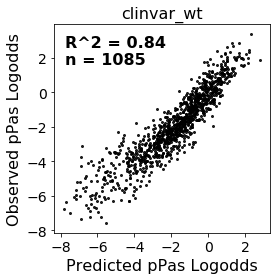

intronic_pas = 9800


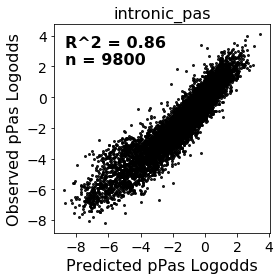

aparent
clinvar_wt = 1085


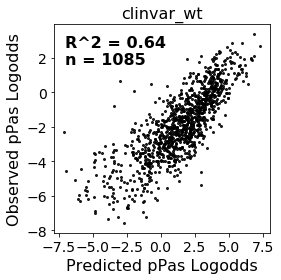

intronic_pas = 9800


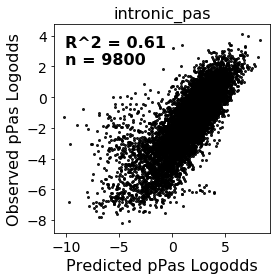

deerect_apa
clinvar_wt = 1085


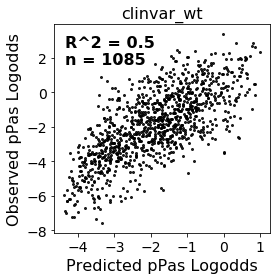

intronic_pas = 9800


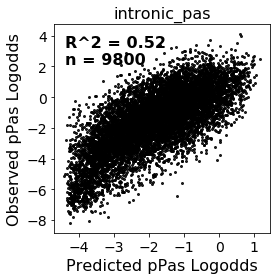

deeppasta
clinvar_wt = 1085


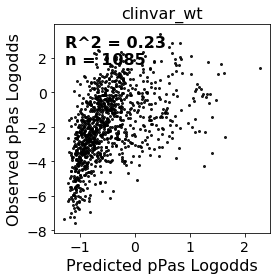

intronic_pas = 9800


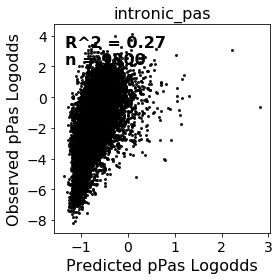

deeppasta_sp
clinvar_wt = 1085


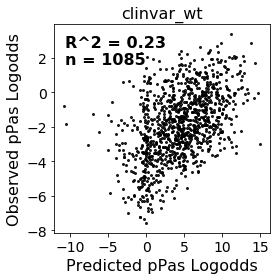

intronic_pas = 9800


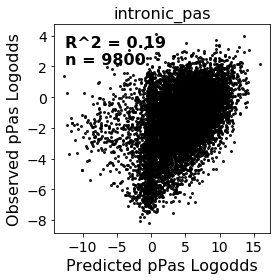

polyapred
clinvar_wt = 1085


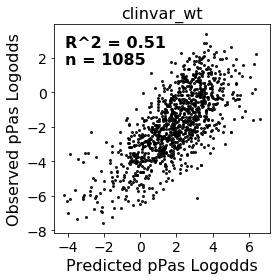

intronic_pas = 9800


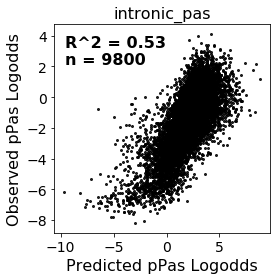

In [10]:
#Absolute native predictions, split by experiment

save_figs = True

seq_dfs = [seq_df_aparent_resnet, seq_df_aparent, seq_df_deerect_apa, seq_df_deeppasta, seq_df_deeppasta_sp, seq_df_polyapred]

save_names = ['aparent-resnet', 'aparent', 'deerect_apa', 'deeppasta', 'deeppasta_sp', 'polyapred']

pred_columns = ['logodds_pred_from_cuts', 'mean_logodds_pred', 'logodds_pred', 'logodds_pred', 'logodds_pred', 'logodds_pred']
true_columns = ['logodds_true', 'logodds_true', 'logodds_true', 'logodds_true', 'logodds_true', 'logodds_true']

for seq_df, save_name, pred_column, true_column in zip(seq_dfs, save_names, pred_columns, true_columns) :

    print(save_name)
    
    for experiment in ['clinvar_wt', 'intronic_pas'] :

        filter_query = "variant == 'wt' and mean_total_count >= 200 and n_barcodes >= 7 and experiment == '" + str(experiment) + "'"
        experiment_seq_predicted_isoform_df = seq_df.query(filter_query)

        logodds_true_is_nan = (np.isnan(experiment_seq_predicted_isoform_df[true_column]) | np.isinf(experiment_seq_predicted_isoform_df[true_column]))
        logodds_pred_is_nan = (np.isnan(experiment_seq_predicted_isoform_df[pred_column]) | np.isinf(experiment_seq_predicted_isoform_df[pred_column]))
        experiment_seq_predicted_isoform_df = experiment_seq_predicted_isoform_df.loc[(logodds_true_is_nan == False) & (logodds_pred_is_nan == False)]

        print(experiment + ' = ' + str(len(experiment_seq_predicted_isoform_df)))

        #Logodds proportions

        r_val, _ = pearsonr(experiment_seq_predicted_isoform_df[pred_column], experiment_seq_predicted_isoform_df[true_column])

        f = plt.figure(figsize=(4, 4))

        plt.scatter(experiment_seq_predicted_isoform_df[pred_column], experiment_seq_predicted_isoform_df[true_column], alpha=0.85, s=4, c='black')

        annot_text = 'R^2 = ' + str(round(r_val * r_val, 2))
        annot_text += '\nn = ' + str(len(experiment_seq_predicted_isoform_df))
        ax = plt.gca()
        ax.text(0.05, 0.95, annot_text, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, color='black', fontsize=16, weight="bold")

        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)

        plt.xlabel('Predicted pPas Logodds', fontsize=16)
        plt.ylabel('Observed pPas Logodds', fontsize=16)
        plt.title(experiment, fontsize=16)

        plt.tight_layout()

        if save_figs :
            plt.savefig(save_name + '_' + file_prefix + '_absolute_usage_pred_vs_true_' + experiment + '.png', transparent=True, dpi=150)
            plt.savefig(save_name + '_' + file_prefix + '_absolute_usage_pred_vs_true_' + experiment + '.eps')

        plt.show()


<h2>Human APA variant predictions</h2>

aparent-resnet


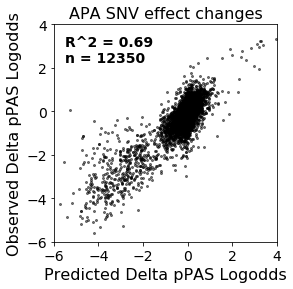

aparent


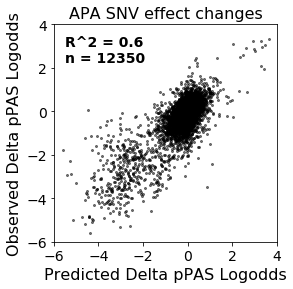

deerect_apa


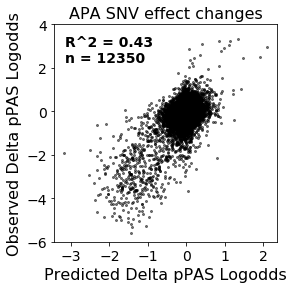

deeppasta


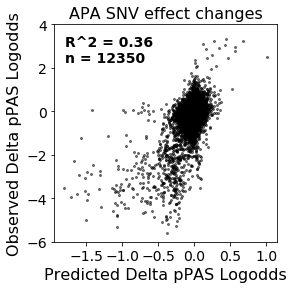

deeppasta_sp


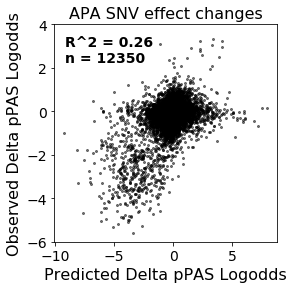

polyapred


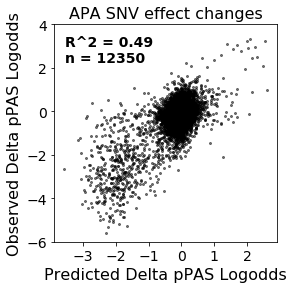

In [11]:
#Variant predictions, log odds ratios

save_figs = True

var_dfs = [aparent_resnet_df, aparent_df, deerect_apa_df, deeppasta_df, deeppasta_sp_df, polyapred_df]

save_names = ['aparent-resnet', 'aparent', 'deerect_apa', 'deeppasta', 'deeppasta_sp', 'polyapred']

pred_columns = ['delta_logodds_pred_from_cuts', 'mean_delta_logodds_pred', 'delta_logodds_pred', 'delta_logodds_pred', 'delta_logodds_pred', 'delta_logodds_pred']
true_columns = ['delta_logodds_true', 'delta_logodds_true', 'delta_logodds_true', 'delta_logodds_true', 'delta_logodds_true', 'delta_logodds_true']

for var_df, save_name, pred_column, true_column in zip(var_dfs, save_names, pred_columns, true_columns) :

    print(save_name)
    
    df_to_use = var_df
    
    #df_to_use = df_to_use.query("pooled_proximal_logodds_ref > -2.0")

    r_val, _ = pearsonr(df_to_use[pred_column], df_to_use[true_column])

    f = plt.figure(figsize=(4, 4))

    plt.scatter(df_to_use[pred_column], df_to_use[true_column], alpha=0.5, s=4, c='black')

    annot_text = 'R^2 = ' + str(round(r_val * r_val, 2))
    annot_text += '\nn = ' + str(len(df_to_use))
    ax = plt.gca()
    ax.text(0.05, 0.95, annot_text, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, color='black', fontsize=14, weight="bold")

    if 'aparent' in save_name :
        plt.xlim(-6, 4)
    plt.ylim(-6, 4)
    
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.xlabel('Predicted Delta pPAS Logodds', fontsize=16)
    plt.ylabel('Observed Delta pPAS Logodds', fontsize=16)
    plt.title('APA SNV effect changes', fontsize=16)

    #plt.tight_layout()

    if save_figs :
        plt.savefig(save_name + '_' + file_prefix + '_delta_usage_pred_vs_true_all.png', dpi=150, transparent=True)
        plt.savefig(save_name + '_' + file_prefix + '_delta_usage_pred_vs_true_all.eps')

    plt.show()


p_thresh = 1.0
delta_thresh = 0.693
nopas = False
 - n_total_variants = 12350
 - n_disruptive_variants = 1532


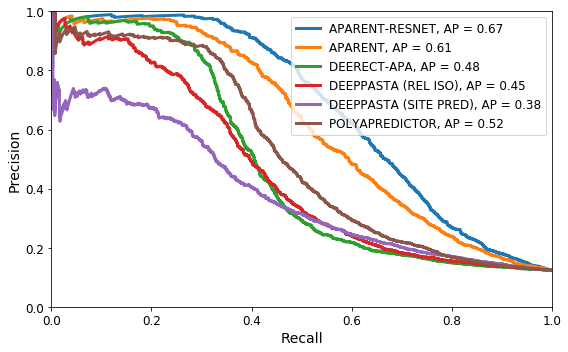

p_thresh = 1.0
delta_thresh = 0.693
nopas = True
 - n_total_variants = 11623
 - n_disruptive_variants = 951


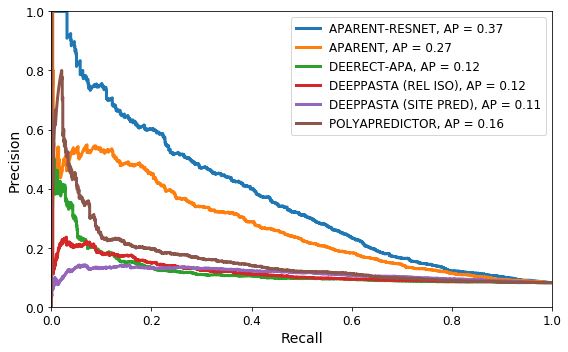

In [12]:
#Compare precision-recall curves for disruptive variant prediction

save_figs = True

min_wt = None

p_threshes = [1.0, 1.0]
delta_threshes = [0.693, 0.693]
nopases = [False, True]

var_dfs = [aparent_resnet_df, aparent_df, deerect_apa_df, deeppasta_df, deeppasta_sp_df, polyapred_df]

model_names = ['APARENT-ResNet', 'APARENT', 'DeeReCT-APA', 'DeepPASTA (Rel Iso)', 'DeepPASTA (Site Pred)', 'PolyApredictor']

pred_columns = ['delta_logodds_pred_from_cuts', 'mean_delta_logodds_pred', 'delta_logodds_pred', 'delta_logodds_pred', 'delta_logodds_pred', 'delta_logodds_pred']

for p_thresh, delta_thresh, nopas in zip(p_threshes, delta_threshes, nopases) :
    
    print("p_thresh = " + str(p_thresh))
    print("delta_thresh = " + str(delta_thresh))
    print("nopas = " + str(nopas))
    
    #Calculate n positives
    aparent_df_filtered = aparent_df.copy()
    if p_thresh is not None and p_thresh < 1.0 :
        aparent_df_filtered = aparent_df_filtered.query("delta_p_val < " + str(p_thresh)).copy()
    if nopas :
        aparent_df_filtered = aparent_df_filtered.query("snv_pos < 50 or snv_pos > 55").copy()
    if min_wt is not None :
        aparent_df_filtered = aparent_df_filtered.query("logodds_true_ref > " + str(min_wt)).copy()
    
    n_total_variants = len(aparent_df_filtered)
    n_disruptive_variants = len(np.nonzero((np.abs(aparent_df_filtered['delta_logodds_true']) > delta_thresh).values)[0])
    
    print(" - n_total_variants = " + str(n_total_variants))
    print(" - n_disruptive_variants = " + str(n_disruptive_variants))
    
    benchmark_name = "apa_human_vars_p_thresh_" + str(p_thresh).replace(".", "_") + "_delta_thresh_" + str(delta_thresh).replace(".", "_") + "_no_pas_" + str(nopas)

    f = plt.figure(figsize=(8, 5))

    ls = []
    
    for model_i, model_name in enumerate(model_names) :
        
        pred_column = pred_columns[model_i]

        var_df_filtered = var_dfs[model_i].copy()
        if p_thresh is not None and p_thresh < 1.0 :
            var_df_filtered = var_df_filtered.query("delta_p_val < " + str(p_thresh)).copy()
        if nopas :
            var_df_filtered = var_df_filtered.query("snv_pos < 50 or snv_pos > 55").copy()
        if min_wt is not None :
            var_df_filtered = var_df_filtered.query("logodds_true_ref > " + str(min_wt)).copy()

        disrupt_labels = np.zeros(len(var_df_filtered))
        disrupt_labels[(np.abs(var_df_filtered['delta_logodds_true']) > delta_thresh)] = 1.

        disrupt_preds = np.abs(np.array(var_df_filtered[pred_column].values))

        precision, recall, thresholds = precision_recall_curve(disrupt_labels, disrupt_preds)

        ap = average_precision_score(disrupt_labels, disrupt_preds)
        ap = str(round(ap, 2))[:4]

        l1, = plt.plot(recall, precision, linewidth=3, label=model_name.upper() + ", AP = " + str(ap))
        ls.append(l1)

        plt.plot()

    plt.xlabel("Recall", fontsize=14)
    plt.ylabel("Precision", fontsize=14)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.xlim(0., 1.)
    plt.ylim(0., 1.)

    #plt.legend(handles=ls, fontsize=12, bbox_to_anchor=(1.01, 1), loc='upper left')
    plt.legend(handles=ls, fontsize=12)
    
    plt.tight_layout()

    if save_figs :
        plt.savefig(benchmark_name + '_' + file_prefix + '_min_wt_' + str(min_wt) + ".png", dpi=300, transparent=True)
        plt.savefig(benchmark_name + '_' + file_prefix + '_min_wt_' + str(min_wt) + ".eps")

    plt.show()


p_thresh = 1.0
delta_thresh = 0.693
nopas = False
 - n_total_variants = 6554
 - n_disruptive_variants = 797


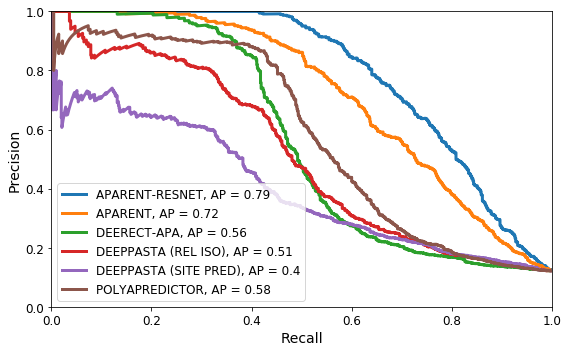

p_thresh = 1.0
delta_thresh = 0.693
nopas = True
 - n_total_variants = 6164
 - n_disruptive_variants = 454


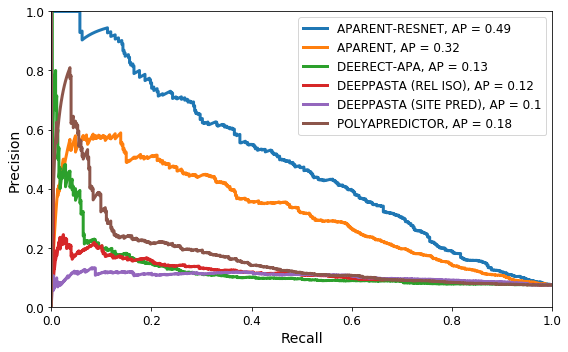

In [13]:
#Compare precision-recall curves for disruptive variant prediction

save_figs = True

min_wt = -2

p_threshes = [1.0, 1.0]
delta_threshes = [0.693, 0.693]
nopases = [False, True]

var_dfs = [aparent_resnet_df, aparent_df, deerect_apa_df, deeppasta_df, deeppasta_sp_df, polyapred_df]

model_names = ['APARENT-ResNet', 'APARENT', 'DeeReCT-APA', 'DeepPASTA (Rel Iso)', 'DeepPASTA (Site Pred)', 'PolyApredictor']

pred_columns = ['delta_logodds_pred_from_cuts', 'mean_delta_logodds_pred', 'delta_logodds_pred', 'delta_logodds_pred', 'delta_logodds_pred', 'delta_logodds_pred']

for p_thresh, delta_thresh, nopas in zip(p_threshes, delta_threshes, nopases) :
    
    print("p_thresh = " + str(p_thresh))
    print("delta_thresh = " + str(delta_thresh))
    print("nopas = " + str(nopas))
    
    #Calculate n positives
    aparent_df_filtered = aparent_df.copy()
    if p_thresh is not None and p_thresh < 1.0 :
        aparent_df_filtered = aparent_df_filtered.query("delta_p_val < " + str(p_thresh)).copy()
    if nopas :
        aparent_df_filtered = aparent_df_filtered.query("snv_pos < 50 or snv_pos > 55").copy()
    if min_wt is not None :
        aparent_df_filtered = aparent_df_filtered.query("logodds_true_ref > " + str(min_wt)).copy()
    
    n_total_variants = len(aparent_df_filtered)
    n_disruptive_variants = len(np.nonzero((np.abs(aparent_df_filtered['delta_logodds_true']) > delta_thresh).values)[0])
    
    print(" - n_total_variants = " + str(n_total_variants))
    print(" - n_disruptive_variants = " + str(n_disruptive_variants))
    
    benchmark_name = "apa_human_vars_p_thresh_" + str(p_thresh).replace(".", "_") + "_delta_thresh_" + str(delta_thresh).replace(".", "_") + "_no_pas_" + str(nopas)

    f = plt.figure(figsize=(8, 5))

    ls = []
    
    for model_i, model_name in enumerate(model_names) :
        
        pred_column = pred_columns[model_i]

        var_df_filtered = var_dfs[model_i].copy()
        if p_thresh is not None and p_thresh < 1.0 :
            var_df_filtered = var_df_filtered.query("delta_p_val < " + str(p_thresh)).copy()
        if nopas :
            var_df_filtered = var_df_filtered.query("snv_pos < 50 or snv_pos > 55").copy()
        if min_wt is not None :
            var_df_filtered = var_df_filtered.query("logodds_true_ref > " + str(min_wt)).copy()

        disrupt_labels = np.zeros(len(var_df_filtered))
        disrupt_labels[(np.abs(var_df_filtered['delta_logodds_true']) > delta_thresh)] = 1.

        disrupt_preds = np.abs(np.array(var_df_filtered[pred_column].values))

        precision, recall, thresholds = precision_recall_curve(disrupt_labels, disrupt_preds)

        ap = average_precision_score(disrupt_labels, disrupt_preds)
        ap = str(round(ap, 2))[:4]

        l1, = plt.plot(recall, precision, linewidth=3, label=model_name.upper() + ", AP = " + str(ap))
        ls.append(l1)

        plt.plot()

    plt.xlabel("Recall", fontsize=14)
    plt.ylabel("Precision", fontsize=14)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.xlim(0., 1.)
    plt.ylim(0., 1.)

    #plt.legend(handles=ls, fontsize=12, bbox_to_anchor=(1.01, 1), loc='upper left')
    plt.legend(handles=ls, fontsize=12)
    
    plt.tight_layout()

    if save_figs :
        plt.savefig(benchmark_name + '_' + file_prefix + '_min_wt_' + str(min_wt) + ".png", dpi=300, transparent=True)
        plt.savefig(benchmark_name + '_' + file_prefix + '_min_wt_' + str(min_wt) + ".eps")

    plt.show()


In [14]:
#Calculate summary variant statistics

p_thresh = 1.0
delta_thresh = 0.693

var_dfs = [aparent_resnet_df, aparent_df, deerect_apa_df, deeppasta_df, deeppasta_sp_df, polyapred_df]

model_names = ['APARENT-ResNet', 'APARENT', 'DeeReCT-APA', 'DeepPASTA (Rel Iso)', 'DeepPASTA (Site Pred)', 'PolyApredictor']

pred_columns = ['delta_logodds_pred_from_cuts', 'mean_delta_logodds_pred', 'delta_logodds_pred', 'delta_logodds_pred', 'delta_logodds_pred', 'delta_logodds_pred']

for model_i, model_name in enumerate(model_names) :
    
    print(model_names[model_i] + ":")
    
    pred_column = pred_columns[model_i]

    df_to_use = var_dfs[model_i]

    df_gene = df_to_use
    df_gene_nopas = df_to_use.query("snv_pos < 50 or snv_pos > 55")

    df_gene_signi = df_gene.query("delta_p_val < " + str(p_thresh) + " and (delta_logodds_true < -" + str(delta_thresh) + " or delta_logodds_true > " + str(delta_thresh) + ")")
    df_gene_signi_nopas = df_gene_nopas.query("delta_p_val < " + str(p_thresh) + " and (delta_logodds_true < -" + str(delta_thresh) + " or delta_logodds_true > " + str(delta_thresh) + ")")

    df_gene_signi_use = df_gene_signi_nopas.query("snv_pos < 50")
    df_gene_signi_dse = df_gene_signi_nopas.query("snv_pos > 55")

    n_variants = len(df_gene)
    n_variants_nopas = len(df_gene_nopas)
    n_variants_signi = len(df_gene_signi)
    n_variants_signi_nopas = len(df_gene_signi_nopas)

    n_variants_use = len(df_gene.query("snv_pos < 50"))
    n_variants_use_nopas = len(df_gene_nopas.query("snv_pos < 50"))
    n_variants_use_signi = len(df_gene_signi.query("snv_pos < 50"))
    n_variants_use_signi_nopas = len(df_gene_signi_nopas.query("snv_pos < 50"))

    n_variants_dse = len(df_gene.query("snv_pos > 55"))
    n_variants_dse_nopas = len(df_gene_nopas.query("snv_pos > 55"))
    n_variants_dse_signi = len(df_gene_signi.query("snv_pos > 55"))
    n_variants_dse_signi_nopas = len(df_gene_signi_nopas.query("snv_pos > 55"))

    r_val, _ = pearsonr(df_gene[pred_column], df_gene['delta_logodds_true'])
    r2 = round(r_val * r_val, 2)
    r_val_nopas, _ = pearsonr(df_gene_nopas[pred_column], df_gene_nopas['delta_logodds_true'])
    r2_nopas = round(r_val_nopas * r_val_nopas, 2)

    r_val, _ = pearsonr(df_gene_signi[pred_column], df_gene_signi['delta_logodds_true'])
    r2_signi = round(r_val * r_val, 2)
    r_val_nopas, _ = pearsonr(df_gene_signi_nopas[pred_column], df_gene_signi_nopas['delta_logodds_true'])
    r2_signi_nopas = round(r_val_nopas * r_val_nopas, 2)

    direction_acc = float(len(np.nonzero(np.sign(np.ravel(df_gene_signi[pred_column])) == np.sign(np.ravel(df_gene_signi['delta_logodds_true'])))[0]))
    direction_acc /= float(len(df_gene_signi))
    direction_acc = round(direction_acc, 3)

    direction_labels_nopas = np.zeros(len(df_gene_signi_nopas))
    direction_labels_nopas[df_gene_signi_nopas[pred_column] > 0.0] = 1
    direction_auc_nopas = np.nan
    if np.sum(direction_labels_nopas) != 0 and np.sum(direction_labels_nopas) != len(direction_labels_nopas) :
        direction_auc_nopas = round(roc_auc_score(direction_labels_nopas, np.ravel(df_gene_signi_nopas[pred_column])), 3)

    direction_acc_nopas = float(len(np.nonzero(np.sign(np.ravel(df_gene_signi_nopas[pred_column])) == np.sign(np.ravel(df_gene_signi_nopas['delta_logodds_true'])))[0]))
    direction_acc_nopas /= float(len(df_gene_signi_nopas))
    direction_acc_nopas = round(direction_acc_nopas, 3)

    direction_acc_use = float(len(np.nonzero(np.sign(np.ravel(df_gene_signi_use[pred_column])) == np.sign(np.ravel(df_gene_signi_use['delta_logodds_true'])))[0]))
    direction_acc_use /= float(len(df_gene_signi_use))
    direction_acc_use = round(direction_acc_use, 3)

    direction_acc_dse = float(len(np.nonzero(np.sign(np.ravel(df_gene_signi_dse['delta_logodds_pred'])) == np.sign(np.ravel(df_gene_signi_dse['delta_logodds_true'])))[0]))
    direction_acc_dse /= float(len(df_gene_signi_dse))
    direction_acc_dse = round(direction_acc_dse, 3)


    print("# UTRs = " + str(len(df_gene['gene'].unique())))
    print("# Variants = " + str(n_variants) + " (" + str(n_variants_nopas) + ")")
    print("## USE Variants = " + str(n_variants_use) + " (" + str(n_variants_use_nopas) + ")")
    print("## DSE Variants = " + str(n_variants_dse) + " (" + str(n_variants_dse_nopas) + ")")
    print("# R^2 = " + str(r2) + " (" + str(r2_nopas) + ")")
    print("")

    print("Significance filter = p < " + str(p_thresh) + ", delta > " + str(delta_thresh))
    print("# Significant variants = " + str(n_variants_signi) + " (" + str(n_variants_signi_nopas) + ")")
    print("## USE Variants = " + str(n_variants_use_signi) + " (" + str(n_variants_use_signi_nopas) + ")")
    print("## DSE Variants = " + str(n_variants_dse_signi) + " (" + str(n_variants_dse_signi_nopas) + ")")
    print("# R^2 = " + str(r2_signi) + " (" + str(r2_signi_nopas) + ")")
    print("# % Significant = " + str(100. * n_variants_signi / n_variants) + " (" + str(100. * n_variants_signi_nopas / n_variants_nopas) + ")")
    print("## % USE Significant = " + str(100. * n_variants_use_signi / n_variants_use) + " (" + str(100. * n_variants_use_signi_nopas / n_variants_use_nopas) + ")")
    print("## % DSE Significant = " + str(100. * n_variants_dse_signi / n_variants_dse) + " (" + str(100. * n_variants_dse_signi_nopas / n_variants_dse_nopas) + ")")
    print("# Direction? Accuracy = " + str(direction_acc) + " (" + str(direction_acc_nopas) + ")")
    print("# USE Direction? Accuracy = " + str(direction_acc_use))
    print("# DSE Direction? Accuracy = " + str(direction_acc_dse))
    
    print("")


APARENT-ResNet:
# UTRs = 1165
# Variants = 12350 (11623)
## USE Variants = 5234 (5234)
## DSE Variants = 6389 (6389)
# R^2 = 0.69 (0.35)

Significance filter = p < 1.0, delta > 0.693
# Significant variants = 1532 (951)
## USE Variants = 300 (300)
## DSE Variants = 651 (651)
# R^2 = 0.71 (0.48)
# % Significant = 12.404858299595142 (8.182052826292695)
## % USE Significant = 5.731753916698509 (5.731753916698509)
## % DSE Significant = 10.189388010643293 (10.189388010643293)
# Direction? Accuracy = 0.905 (0.852)
# USE Direction? Accuracy = 0.78
# DSE Direction? Accuracy = 0.842

APARENT:
# UTRs = 1165
# Variants = 12350 (11623)
## USE Variants = 5234 (5234)
## DSE Variants = 6389 (6389)
# R^2 = 0.6 (0.21)

Significance filter = p < 1.0, delta > 0.693
# Significant variants = 1532 (951)
## USE Variants = 300 (300)
## DSE Variants = 651 (651)
# R^2 = 0.63 (0.35)
# % Significant = 12.404858299595142 (8.182052826292695)
## % USE Significant = 5.731753916698509 (5.731753916698509)
## % DSE Sign